## _reduce_sqrt

In [1]:
from collections import Counter

counter = Counter()
def factor_sqrt(r):
    s, i = 1, 2
    
    counter.update(['__pow__', '__le__'])
    while i**2 <= r:
        counter.update(['__pow__', '__le__'])
        
        counter.update(['__mod__', '__pow__', '__bool__'])
        while not r % i**2:
            counter.update(['__mod__', '__pow__', '__bool__'])
            
            r //= i**2
            s *= i
            counter.update(['__ifloordiv__', '__pow__', '__imul__'])
        
        i += 1
        counter.update(['__iadd__'])
    
    return s, r

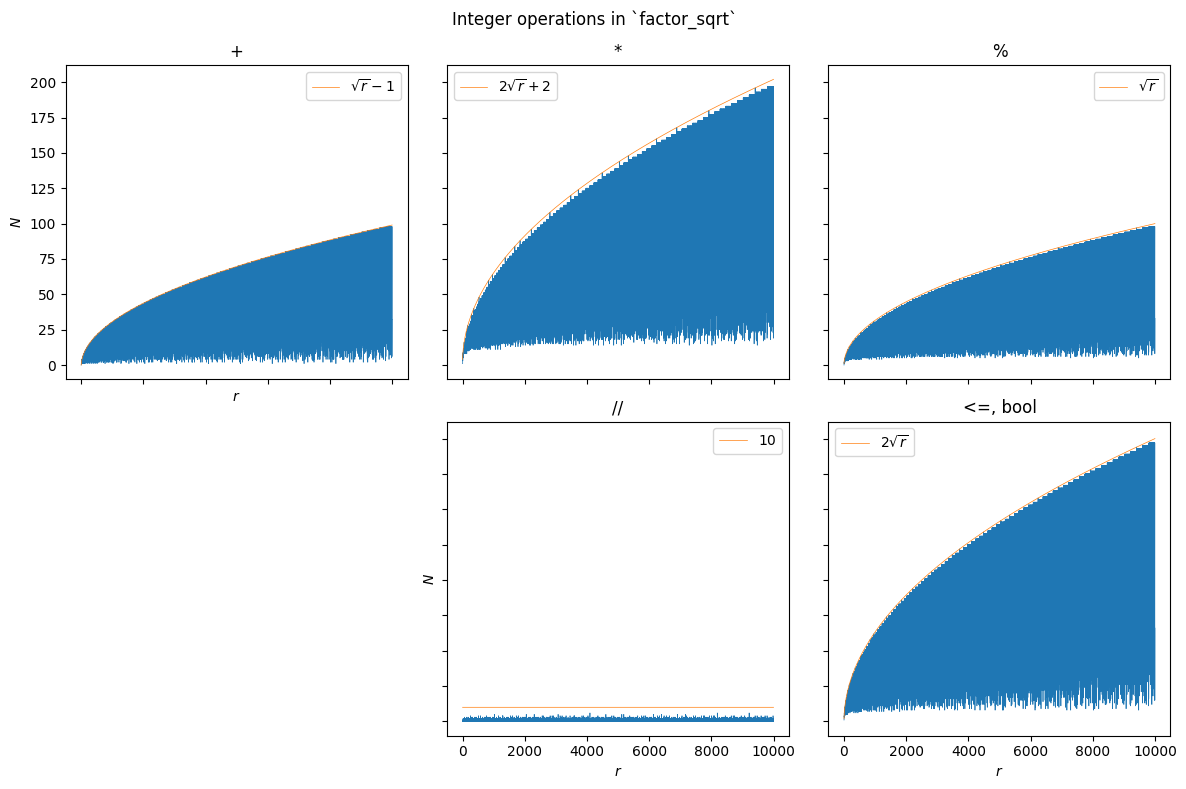

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rs, adds, muls, divs, mods, comps = [], [], [], [], [], []

for r in range(1, 10000):
    counter.clear()
    s, _r = factor_sqrt(r)
    assert s**2 * _r == r
    
    rs += [r]
    adds += [counter['__iadd__']]
    muls += [counter['__imul__'] + counter['__pow__']]
    divs += [counter['__ifloordiv__']]
    mods += [counter['__mod__']]
    comps += [counter['__le__'] + counter['__bool__']]

rs, adds = np.array(rs), np.array(adds)
muls, divs = np.array(muls), np.array(divs)
mods, comps = np.array(mods), np.array(comps)


fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12, 8))

fig.suptitle('Integer operations in `factor_sqrt`')

axs[0, 0].set_title('+')
axs[0, 0].plot(rs, adds, lw=0.5)
axs[0, 0].plot(rs, np.sqrt(rs)-1, lw=0.5, label=r'$\sqrt{r}-1$')
axs[0, 0].legend()
axs[0, 0].set_xlabel('$r$')
axs[0, 0].set_ylabel('$N$')
assert all(adds <= np.sqrt(rs)-1)

axs[1, 0].axis('off')

axs[0, 1].set_title('*')
axs[0, 1].plot(rs, muls, lw=0.5)
axs[0, 1].plot(rs, 2*np.sqrt(rs)+2, lw=0.5, label=r'2$\sqrt{r}+2$')
axs[0, 1].legend()
assert all(muls <= 2*np.sqrt(rs)+2)

axs[1, 1].set_title('//')
axs[1, 1].plot(rs, divs, lw=0.5)
axs[1, 1].plot(rs, 10*np.ones_like(rs), lw=0.5, label=r'$10$')
axs[1, 1].legend()
axs[1, 1].set_xlabel('$r$')
axs[1, 1].set_ylabel('$N$')
assert all(divs <= 10*np.ones_like(rs))

axs[0, 2].set_title('%')
axs[0, 2].plot(rs, mods, lw=0.5)
axs[0, 2].plot(rs, np.sqrt(rs), lw=0.5, label=r'$\sqrt{r}$')
axs[0, 2].legend()
assert all(mods <= np.sqrt(rs))

axs[1, 2].set_title('<=, bool')
axs[1, 2].plot(rs, comps, lw=0.5)
axs[1, 2].plot(rs, 2*np.sqrt(rs), lw=0.5, label=r'$2\sqrt{r}$')
axs[1, 2].legend()
axs[1, 2].set_xlabel('$r$')
assert all(comps <= 2*np.sqrt(rs))

plt.tight_layout()
plt.savefig('factor_sqrt_profiling.png', dpi=300)
plt.show()